In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np

from pathlib import Path
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import cmocean.cm as cmo

In [2]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)
df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']
df_doc = df_doc[df_doc['Type'] == 'WC']
df_doc.index = df_doc['code']
df_doc

,Treatment,Campaign,Date,Location,NPOC Conc (mg/L),TN Conc (mg/L),Depth,Notes,Type,Time,Dil Factor,NPOC_uM,TN_uM,dil_fac,NPOC_uM_std,TN_uM_std,code
code,,,,,,,,,,,,,,,,,
St.MK_GOM2021,P2F,GOM2021,7/15/2021,St.MK,1.22200,0.1955,16.7,NaN,WC,NaN,NaN,101.833333,13.964286,NaN,2.988328,0.517500,St.MK_GOM2021
St.MK_GOM2021,P2F,GOM2021,7/15/2021,St.MK,1.22350,0.182,16.7,NaN,WC,NaN,NaN,101.958333,13.000000,NaN,2.991996,0.481765,St.MK_GOM2021
St.MK_GOM2021,P2F,GOM2021,7/15/2021,St.MK,1.35050,0.11485,14.0,NaN,WC,NaN,NaN,112.541667,8.203571,NaN,3.302567,0.304015,St.MK_GOM2021
St.MK_GOM2021,P2F,GOM2021,7/15/2021,St.MK,1.57650,BDL,14.0,NaN,WC,NaN,NaN,131.375000,0.323571,NaN,3.855237,0.011991,St.MK_GOM2021
St.MK_GOM2021,P2F,GOM2021,7/15/2021,St.MK,1.45250,0.1677,10.0,NaN,WC,NaN,NaN,121.041667,11.978571,NaN,3.552002,0.443912,St.MK_GOM2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St.12_GOM22SU,P2F,GOM22SU,7/21/2022,St.12,0.97345,0.066635,70.6,TN STD LOW,WC,NaN,NaN,81.120833,4.759643,NaN,0.321938,0.028041,St.12_GOM22SU
St.12_GOM22SU,P2F,GOM22SU,7/21/2022,St.12,1.04600,0.076015,45.0,TN STD LOW,WC,NaN,NaN,87.166667,5.429643,NaN,0.345932,0.031989,St.12_GOM22SU
St.12_GOM22SU,P2F,GOM22SU,7/21/2022,St.12,1.06300,0.07098,21.0,TN STD LOW,WC,NaN,NaN,88.583333,5.070000,NaN,0.351554,0.029870,St.12_GOM22SU


In [3]:
df_sum = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Station_summary.csv', sep=',', index_col=0)
df_sum_lat = df_sum['latitude']
df_sum_lon = df_sum['longitude']

In [4]:
df_doc['latitude'] = df_sum_lat
df_doc['longitude'] = df_sum_lon
df_doc['codex'] = df_doc['code'] 


df_doc['max_depth'] = df_doc.groupby('codex')['Depth'].transform('max')
df_doc['depth_from_bottom'] = df_doc['max_depth'] - df_doc['Depth']

df_doc[df_doc['Location'] == df_doc['latitude'].unique()

array(['St.MK_GOM2021', 'St.5B_GOM2021', 'St.4_GOM2021', 'St.14_GOM2021',
       'St.9_GOM2021', 'St.13_GOM2021', 'St.2_GOM2021', 'St.15_GOM2021',
       'St.16_GOM2021', 'St.11_GOM2021', 'St.7_GOM2021', 'St.ML_GOM2021',
       'St.5B_GOM21FA', 'St.6_GOM21FA', 'St.4_GOM21FA', 'St.MK_GOM21FA',
       'St.MK-2_GOM21FA', 'St.7_GOM21FA', 'St.14_GOM21FA', 'St.9_GOM21FA',
       'St.14.5_GOM21FA', 'St.15_GOM21FA', 'St.2_GOM21FA',
       'St.16_GOM21FA', 'St.12_GOM21FA', 'St.11_GOM21FA', 'St.13_GOM21FA',
       'St.16-2_GOM21FA', 'St.7_GOM22SP', 'St.16_GOM22SP',
       'St.5B_GOM22SP', 'St.15_GOM22SP', 'St.14_GOM22SP', 'St.2_GOM22SP',
       'St.13_GOM22SP', 'St.MK_GOM22SP', 'St.4_GOM22SP', 'St.4_GOM22SU',
       'St.5B_GOM22SU', 'St.13_GOM22SU', 'St.2_GOM22SU', 'St.7_GOM22SU',
       'St.15_GOM22SU', 'St.16_GOM22SU', 'St.11_GOM22SU', 'St.MK_GOM22SU',
       'St.9_GOM22SU', 'St.9_GOM22SP', 'St.14_GOM22SU', 'St.12_GOM22SU'],
      dtype=object)

In [11]:
lat_top=30
lat_bot=27.7
lon_left=-92
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='white', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    ax.add_feature(cfeature.COASTLINE, linewidth=3)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax



C:\Users\hmlbr\AppData\Local\Temp\ipykernel_40476\3651601687.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


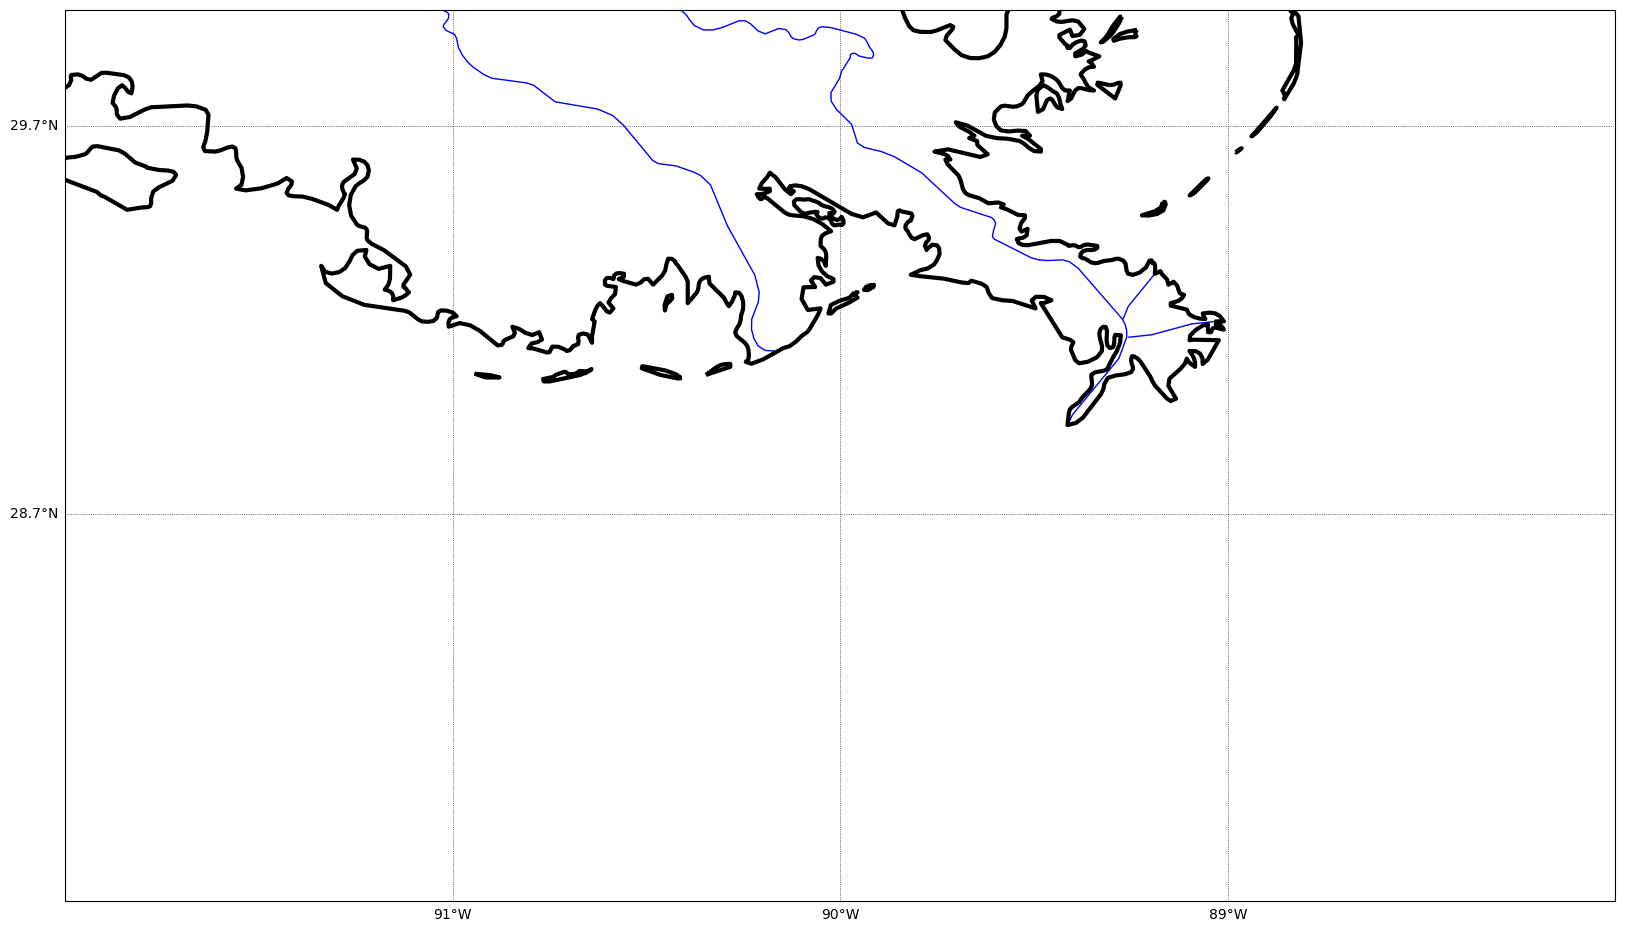

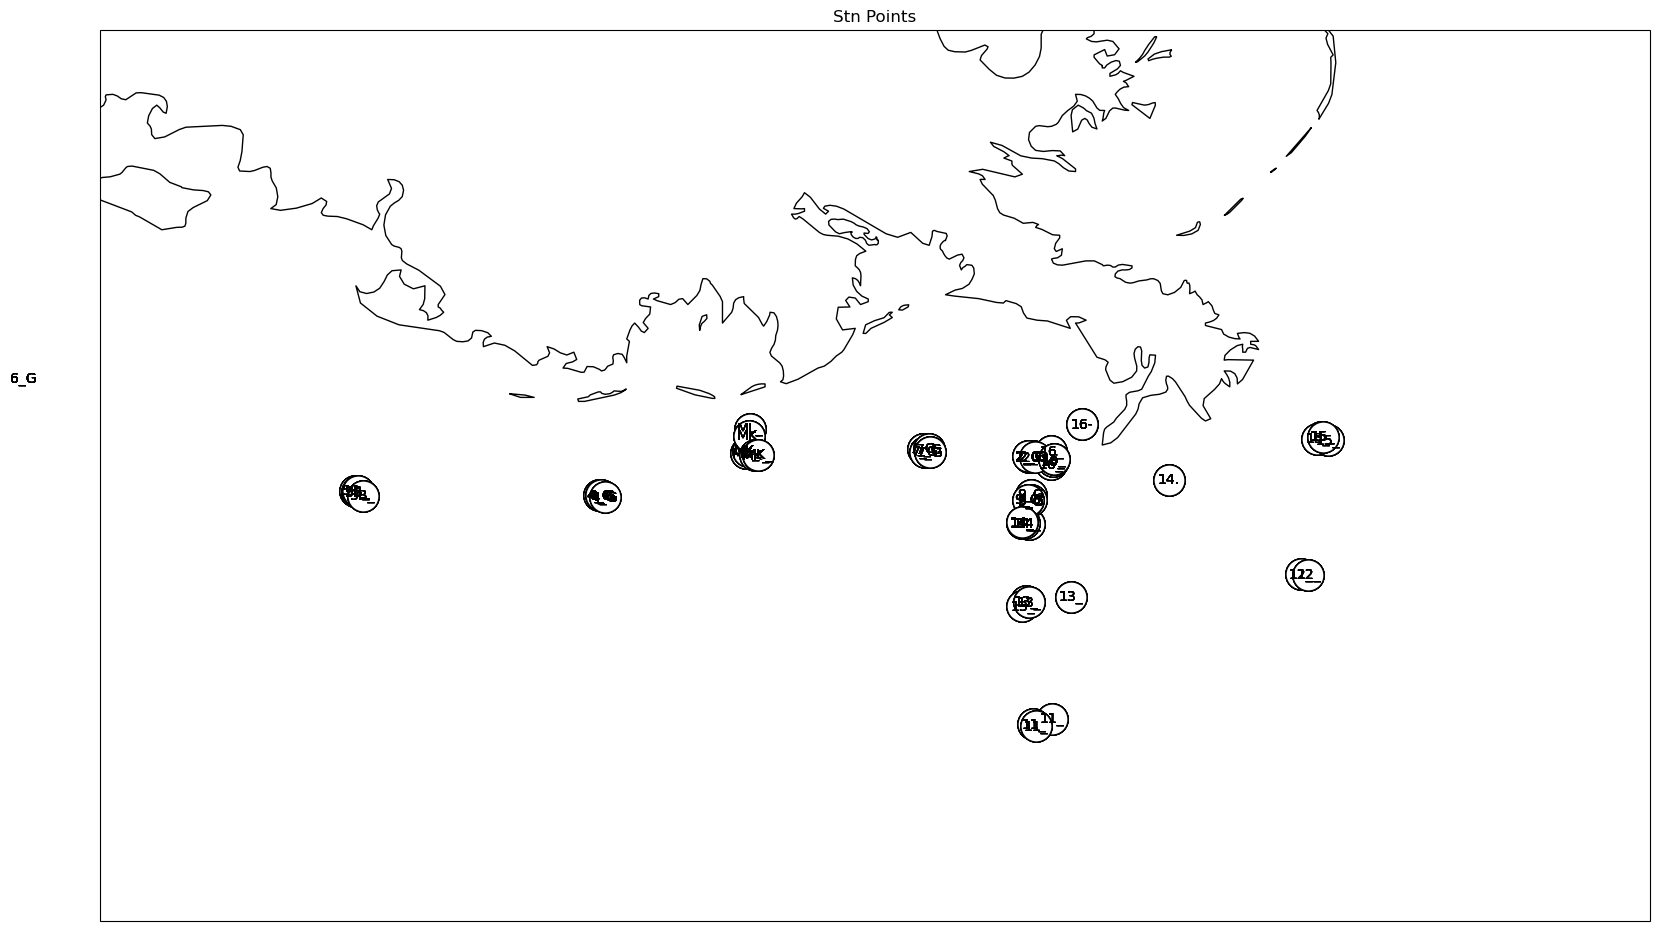

In [13]:
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)

# Generate text labels, longitude, and latitude
text = [x[3:6] for x in df_doc.index.ravel()]
lon = df_doc['longitude']
lat = df_doc['latitude']

# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent (make sure it covers your points)
axes.set_extent(extent, crs=ccrs.PlateCarree())

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='black',
                        s=500,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=10, transform=ccrs.PlateCarree(), zorder=3)

# Customize the plot
plt.title('Stn Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot

# Show the plot
plt.show()

In [5]:
df_doc_GOM2021 = df_doc[df_doc['Campaign'] == 'GOM2021']
df_doc_GOM21FA = df_doc[df_doc['Campaign'] == 'GOM21FA']
df_doc_GOM22SP = df_doc[df_doc['Campaign'] == 'GOM22SP']
df_doc_GOM22SU = df_doc[df_doc['Campaign'] == 'GOM22SU']


In [6]:
df_doc_GOM2021.to_csv('../Dissertation_projects/Data/CTD/GOM2021_water_DOC.csv')
df_doc_GOM21FA.to_csv('../Dissertation_projects/Data/CTD/GOM21FA_water_DOC.csv')
df_doc_GOM22SP.to_csv('../Dissertation_projects/Data/CTD/GOM22SP_water_DOC.csv')
df_doc_GOM22SU.to_csv('../Dissertation_projects/Data/CTD/GOM22SU_water_DOC.csv')


